##Performing Analysis of Meteorological Data

In [2]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
path = '..//weatherHistory.csv'
df=pd.read_csv(path)

In [5]:
df.sample(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
59801,2012-11-04 18:00:00.000 +0100,Mostly Cloudy,rain,15.094444,15.094444,0.72,14.1197,141,9.9820,1010.73,Mostly cloudy throughout the day.
90197,2016-02-21 08:00:00.000 +0100,Overcast,rain,3.933333,-0.250000,0.88,19.8996,211,11.9784,1018.44,Overcast throughout the day.
66881,2013-03-24 17:00:00.000 +0100,Overcast,snow,-0.050000,-5.705556,0.47,23.0552,32,9.9820,1018.86,Overcast throughout the day.
35443,2010-04-22 19:00:00.000 +0200,Mostly Cloudy,rain,11.044444,11.044444,0.56,7.8890,253,9.9820,1017.57,Mostly cloudy until evening.
2502,2006-02-20 06:00:00.000 +0100,Mostly Cloudy,rain,2.827778,-0.472222,0.88,12.5580,142,9.9820,1011.71,Mostly cloudy starting overnight continuing un...


In [6]:
df.shape


(96453, 11)

In [7]:
df.dtypes


Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [8]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [9]:
df.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [10]:
df = df.set_index("Formatted Date")
df.head(2)


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.


In [11]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


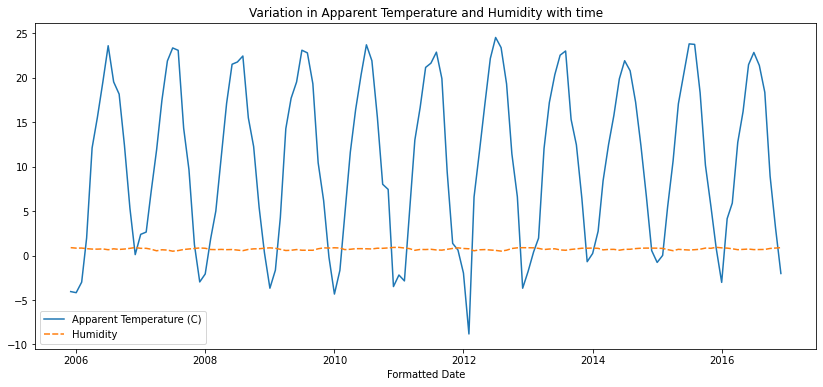

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

In [13]:
df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)
df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.782770  0.650222
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 0, 'Month of April')

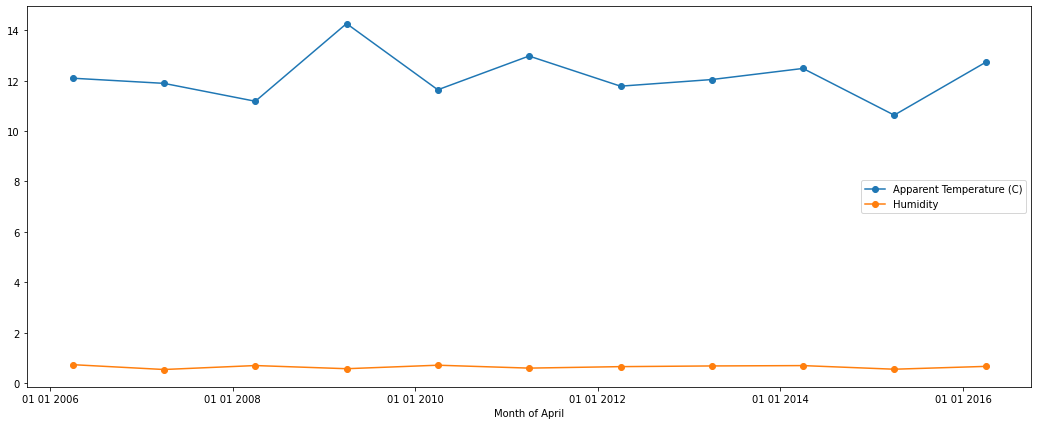

In [14]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
#ax.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009','04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc ='center right')
ax.set_xlabel('Month of April')

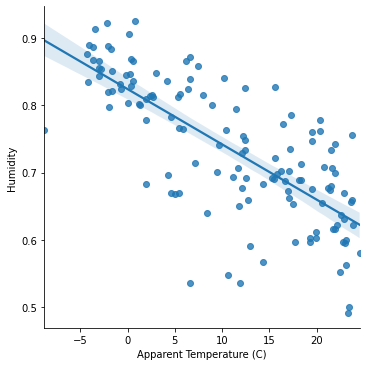

In [15]:
sns.lmplot(x='Apparent Temperature (C)',y='Humidity',data=df_monthly_mean)
plt.show()

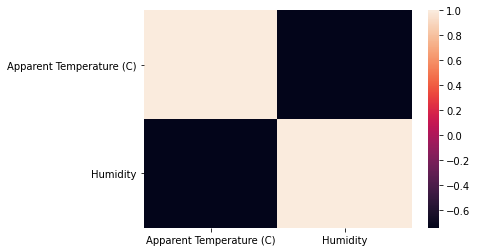

In [16]:
corr = df_monthly_mean.corr()
sns.heatmap(corr)

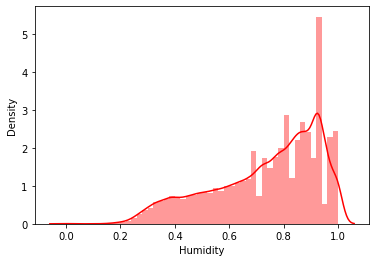

In [17]:
sns.distplot(df.Humidity,color='red')


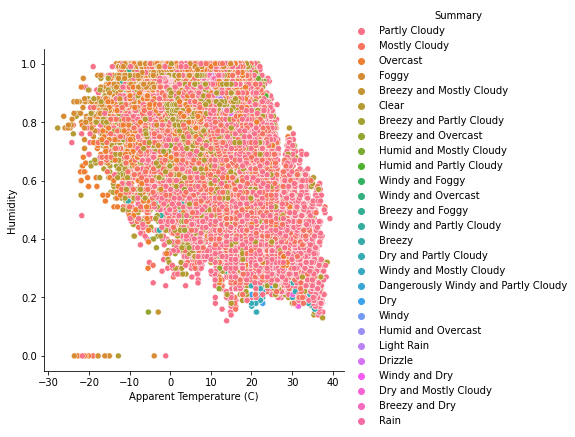

In [18]:
sns.relplot(data=df,x="Apparent Temperature (C)",y="Humidity",color="purple",hue="Summary")